In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
df=pd.read_csv('test.csv')
#print(df.head())
user_ids=df.user_id.unique()
#print(len(user_ids))
total_challenges=df.user_sequence.count()
df_id=pd.DataFrame()
df_id['index']=[i for i in range(0,len(user_ids))]
df_id['id']=np.nan
for count,rows in enumerate(df_id.index):
	df_id['id'][count]=user_ids[count]
df_id.drop(['index'],1,inplace=True)

rows_processed=0
for i in range(1,14):
	df_id['challenge_{}'.format(i)]=np.nan

for count,rows in (enumerate(df['challenge'])):
	userid=df.user_sequence[count].split("_")[0]
	challenge_seq=df.user_sequence[count].split("_")[1]
	
	for counter,ids in (enumerate(df_id['id'])):
	 if ids==int(userid):
		 #print(count) 
		 #print(df['challenge'][df.index])
		 #print('processing ',counter ,' for id ',ids)
		 df_id['challenge_{}'.format(challenge_seq)][counter]=df['challenge'][count]
		 '''print(df_id.head())'''
		 rows_processed+=1
		 if rows_processed%10000==0:
		 	print('{} rows processed out of {} => {}%'.format(rows_processed,total_challenges,(rows_processed*100)/total_challenges))
	 	
		 break
	 	
df_id.to_csv('tester_challenges.csv',index=False)







FileNotFoundError: ignored

In [1]:
!unzip file.zip

Archive:  file.zip
   creating: content/
   creating: content/.config/
 extracting: content/.config/config_sentinel  
  inflating: content/.config/.last_update_check.json  
   creating: content/.config/logs/
   creating: content/.config/logs/2020.06.17/
  inflating: content/.config/logs/2020.06.17/16.18.44.263522.log  
  inflating: content/.config/logs/2020.06.17/16.18.24.878976.log  
  inflating: content/.config/logs/2020.06.17/16.17.52.116219.log  
  inflating: content/.config/logs/2020.06.17/16.18.30.389925.log  
  inflating: content/.config/logs/2020.06.17/16.18.44.921040.log  
  inflating: content/.config/logs/2020.06.17/16.18.11.544396.log  
 extracting: content/.config/.last_opt_in_prompt.yaml  
   creating: content/.config/configurations/
  inflating: content/.config/configurations/config_default  
 extracting: content/.config/.last_survey_prompt.yaml  
 extracting: content/.config/gce     
 extracting: content/.config/active_config  
 extracting: content/.config/.metricsUUID  

In [114]:
df=pd.read_csv('safe.csv')

def handle_non_numeric_data(df):
	columns=df.columns.values
	#print(columns)
	for column in columns:
		text_digit_vals={}
		def convert_to_int(val):
			return text_digit_vals[val]
		if df[column].dtype!=np.int64 and df[column].dtype!=np.float64:
			column_contents=df[column].values.tolist()
			unique_elements=set(column_contents)

			x=0
			for unique in unique_elements:
				if unique not in text_digit_vals:
					text_digit_vals[unique]=x
					x+=1

			df[column]=list(map(convert_to_int,df[column]))
	#df.to_csv('finale.csv',index=False)
	return df

df=handle_non_numeric_data(df)
print(df.head())
df.drop(['challenge_12','challenge_13','id'],1,inplace=True)
x=np.array(df.drop(['challenge_11'],1).astype(float))
#print(x)
#x=preprocessing.scale(x)
#print(x)
y=np.array(df.challenge_11)
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
xgb11=XGBRegressor(n_estimators=1000)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
xgb11.fit(x,y)
accuracy=xgb11.score(x_test,y_test)
print(accuracy)


       id  challenge_1  challenge_2  ...  challenge_11  challenge_12  challenge_13
0  4576.0         1508         1508  ...           239          2746          3499
1  4580.0          477         1508  ...          2490           680          1105
2  4581.0          476          502  ...          2648          2128          2632
3  4582.0         1292         1274  ...          1874          1136           547
4  4585.0         1292          209  ...          2614          3527           521

[5 rows x 14 columns]
[13:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [1]:
!unzip 'train.zip'

Archive:  train.zip
  inflating: challenge_data.csv      
  inflating: train.csv               


In [53]:
df_train=pd.read_csv('tester_challenges.csv')
columns=[ 'challenge_1', 'challenge_2' ,'challenge_3', 'challenge_4',
 'challenge_5' ,'challenge_6', 'challenge_7' ,'challenge_8' ,'challenge_9',
 'challenge_10']
#print(columns)
for column in columns:
    for count,rows in enumerate(df_train[column]):
        df_train[column][count]=rows.split("I")[-1]
        print(column, " being processed", df_train[column][count])
df_train.to_csv('preprocessed_test.csv',index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Streaming output truncated to the last 5000 lines.
challenge_10  being processed 24531
challenge_10  being processed 28401
challenge_10  being processed 28580
challenge_10  being processed 24867
challenge_10  being processed 26986
challenge_10  being processed 24400
challenge_10  being processed 26186
challenge_10  being processed 26909
challenge_10  being processed 26919
challenge_10  being processed 26912
challenge_10  being processed 26186
challenge_10  being processed 24446
challenge_10  being processed 25179
challenge_10  being processed 23855
challenge_10  being processed 25291
challenge_10  being processed 26054
challenge_10  being processed 23769
challenge_10  being processed 26937
challenge_10  being processed 23510
challenge_10  being processed 26052
challenge_10  being processed 26129
challenge_10  being processed 28969
challenge_10  being processed 24927
challenge_10  being processed 24942
challenge_10  being processed 26157
challenge_10  being processed 28197
challenge_10 

In [ ]:
df_use=pd.read_csv('testerlangcat.csv')
print(df_use.head())
df_use.drop(['challenge_12','challenge_13','id'],1,inplace=True)
x=np.array(df_use.drop(['challenge_11'],1).astype(float))
#print(x)
#x=preprocessing.scale(x)
#print(x)

y=np.array(df_use.challenge_11)
from xgboost import XGBRegressor,plot_importance
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
hyperparams={'learning_rate': 0.1, 'max_depth': 200, 'n_estimators': 1500}
xgb_11=XGBRegressor(**hyperparams)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
xgb_11.fit(x,y)
accuracy=xgb_11.score(x_test,y_test)
print(accuracy)
plot_importance(xgb_11)
#print(x)
plt.show()
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
GBR=XGBRegressor()

'''search_grid={'n_estimators':[200,500,1000],'learning_rate':[0.1],'max_depth':[200]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_root_mean_squared_error',n_jobs=-1)
search.fit(x_train,y_train)
print(search.best_params_)
'''


     id  challenge_1  challenge_2  ...  challenge_13  cat_agg  series_agg
0  4576        23714        23855  ...         23691     29.0      2545.0
1  4580        23663        23855  ...         26051     29.0      2468.0
2  4581        26155        26156  ...         26167     69.0      2634.0
3  4582        23855        24915  ...         24957     29.0      2545.0
4  4585        23855        23975  ...         25126     29.0      2545.0

[5 rows x 16 columns]
[15:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


     id  challenge_1  challenge_2  ...  challenge_13  cat_agg  series_agg
0  4576        23714        23855  ...         23691     29.0      2545.0
1  4580        23663        23855  ...         26051     29.0      2468.0
2  4581        26155        26156  ...         26167     69.0      2634.0
3  4582        23855        24915  ...         24957     29.0      2545.0
4  4585        23855        23975  ...         25126     29.0      2545.0

[5 rows x 16 columns]
[13:52:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9999999999692724


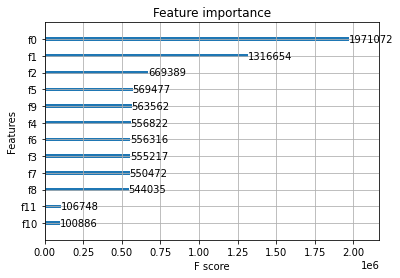

In [5]:
df_use=pd.read_csv('testerlangcat.csv')
print(df_use.head())
df_use.drop(['challenge_11','challenge_13','id'],1,inplace=True)
x=np.array(df_use.drop(['challenge_12'],1).astype(float))
#print(x)
#x=preprocessing.scale(x)
#print(x)
y=np.array(df_use.challenge_12)

xgb_12=XGBRegressor(**hyperparams)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
xgb_12.fit(x,y)
accuracy=xgb_12.score(x_test,y_test)
print(accuracy)
plot_importance(xgb_12)
#print(x)
plt.show()

     id  challenge_1  challenge_2  ...  challenge_13  cat_agg  series_agg
0  4576        23714        23855  ...         23691     29.0      2545.0
1  4580        23663        23855  ...         26051     29.0      2468.0
2  4581        26155        26156  ...         26167     69.0      2634.0
3  4582        23855        24915  ...         24957     29.0      2545.0
4  4585        23855        23975  ...         25126     29.0      2545.0

[5 rows x 16 columns]
[14:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9999999999689484


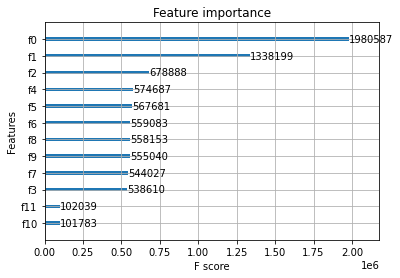

In [8]:
df_use=pd.read_csv('testerlangcat.csv')
print(df_use.head())
df_use.drop(['id','challenge_12','challenge_11'],1,inplace=True)
x=np.array(df_use.drop(['challenge_13'],1).astype(float))
#print(x)
#x=preprocessing.scale(x)
#print(x)
y=np.array(df_use.challenge_13)

xgb_13=XGBRegressor(**hyperparams)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
xgb_13.fit(x,y)
accuracy=xgb_13.score(x_test,y_test)
print(accuracy)
plot_importance(xgb_13)
#print(x)
plt.show()

In [48]:
!unzip "test.zip"

Archive:  test.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     


In [15]:
df_test=pd.read_csv('testkaro.csv')
#print(df_test.head())
with open('recommendation-submission.csv','w') as f:
    f.write('user_sequence,challenge\n')
for iterator,rows in (enumerate(df_test['id'])):
    lister=[]
    twister=[]
    barrister=[]
    for i in range(1,11):
        
        lister.append(df_test["challenge_{}".format(i)][iterator])
    lister.append(df_test["cat_agg"][iterator])
    lister.append(df_test["series_agg"][iterator])

        
        
    #print(int(xgb_11.predict(lister)))
    with open('recommendation-submission.csv','a') as f:
        f.write("{}_11,CI{}\n".format(int(rows),int(xgb_11.predict(lister))))
        f.write("{}_12,CI{}\n".format(int(rows),int(xgb_12.predict(lister))))
        f.write("{}_13,CI{}\n".format(int(rows),int(xgb_13.predict(lister))))
    #print(int(rows),int(xgb_11.predict(lister)),int(xgb_12.predict(lister)),int(xgb_13.predict(lister)))
    

    

  
    



In [11]:
import pandas as pd
df=pd.read_csv('challenge_data.csv')
#print(df.head())
df_train=pd.read_csv('testerthis.csv')
columns=[ 'challenge_1', 'challenge_2' ,'challenge_3', 'challenge_4',
 'challenge_5' ,'challenge_6', 'challenge_7' ,'challenge_8' ,'challenge_9',
 'challenge_10']
for i in range(1,11):
    df_train['challenge_{}_series'.format(i)]=0
for colno,column in enumerate(columns):
    for iter,rows in enumerate(df_train[column]):
        for counter,values in enumerate(df['challenge_ID']):
            if int(values.split("I")[-1])==rows:
                #print(df['programming_language'][counter])
                df_train['challenge_{}_series'.format(colno+1)][iter]=df['challenge_series_ID'][counter]
                #print('Processing column {}'.format(column))

df_train.to_csv('langstest.csv',index=False)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
df_train.to_csv('categoricaltester.csv',index=False)

In [12]:
df=pd.read_csv('langstest.csv')
print(df.head())

def max_occurence(lister):
    a=np.zeros([5000])
    for i in lister:
        a[i]+=1
    return np.argmax(a)
df['series_agg']=np.nan
df.fillna(0,inplace=True)
for iter,rows in enumerate(df.id):
    lister=[]
    for i in range(1,11):
        lister.append(df['challenge_{}_series'.format(i)])
    
    df['series_agg'][iter]= max_occurence(lister)
    #print(max_occurence(lister))
df.to_csv('testingkaro.csv',index=False)

     id  challenge_1  ...  challenge_9_series  challenge_10_series
0  4577        23855  ...              2605.0               2501.0
1  4578        23663  ...              2545.0               2463.0
2  4579        26939  ...              2677.0               2677.0
3  4583        23663  ...              2501.0               2463.0
4  4584        23855  ...              2556.0               2453.0

[5 rows x 25 columns]


IndexError: ignored

In [141]:
!zip -r /content/file.zip /content


  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2020.06.17/ (stored 0%)
  adding: content/.config/logs/2020.06.17/16.18.44.263522.log (deflated 55%)
  adding: content/.config/logs/2020.06.17/16.18.24.878976.log (deflated 87%)
  adding: content/.config/logs/2020.06.17/16.17.52.116219.log (deflated 92%)
  adding: content/.config/logs/2020.06.17/16.18.30.389925.log (deflated 54%)
  adding: content/.config/logs/2020.06.17/16.18.44.921040.log (deflated 53%)
  adding: content/.config/logs/2020.06.17/16.18.11.544396.log (deflated 54%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)

In [125]:
import numpy as np
import statistics
df=pd.read_csv('categoricaltester.csv')
print(df.head())

df.fillna(300,inplace=True)
df.to_csv('testerr1.csv',index=False)

       id  challenge_1  ...  challenge_9_category  challenge_10_category
0  4577.0        23855  ...                  29.0                   29.0
1  4578.0        23663  ...                  41.0                   29.0
2  4579.0        26939  ...                  28.0                   28.0
3  4583.0        23663  ...                  29.0                   31.0
4  4584.0        23855  ...                  46.0                   29.0

[5 rows x 24 columns]


In [24]:
df=pd.read_csv('69.csv')
df.drop(['iddd'],1,inplace=True)
df.to_csv('finaltrn.csv',index=False)

In [13]:
df=pd.read_csv('langstest.csv')
print(df.head())
def return_cat(lister):
    
    arr=np.zeros([5000])
    for l in lister:
        #print(l)
        arr[l]+=1
        
    #print(arr)
    return np.argmax(arr)

df['series_agg']=np.nan
df.fillna(0,inplace=True)
for iter,rows in enumerate(df['challenge_1']):
    lister=[]

    for i in range(1,11):
        lister.append(int(df['challenge_{}_series'.format(i)][iter]))
    #print(lister)
    
    df['series_agg'][iter]= return_cat(lister)
    

    #print(df['cat_agg'][iter])
df.to_csv('testkaro.csv',index=False)

     id  challenge_1  ...  challenge_9_series  challenge_10_series
0  4577        23855  ...              2605.0               2501.0
1  4578        23663  ...              2545.0               2463.0
2  4579        26939  ...              2677.0               2677.0
3  4583        23663  ...              2501.0               2463.0
4  4584        23855  ...              2556.0               2453.0

[5 rows x 25 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
for i in range(1,11):
    df.drop(['challenge_{}_series'.format(i)],1,inplace=True)

df.to_csv('testkaro.csv',index=False)




